# Transfer Learning

---

## Description
This script will use the pretrained VGG 16, Inception, Resnet, Mobilenet for classification. Here we will lookout for features that were common in images of earthquake and based on collective probabilities of top 5 features we will decide if the image is useful for us, i.e it is relevant or irrelevant (Eg. Meme)

This model can be used to filter out irrelevant images from data scraped from social media following the policy described earlier. The actual working script is in the same directory named as 'Transfer Learning Filter.ipynb'

In [1]:
import keras
import numpy as np
from keras.applications import vgg16, inception_v3, resnet50, mobilenet
 
#Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet')
 
#Load the Inception_V3 model
inception_model = inception_v3.InceptionV3(weights='imagenet')
 
#Load the ResNet50 model
resnet_model = resnet50.ResNet50(weights='imagenet')
 
#Load the MobileNet model
mobilenet_model = mobilenet.MobileNet(weights='imagenet')

Using TensorFlow backend.


In [2]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def processImage(img_url):
    filename = img_url
    # load an image in PIL format
    original = load_img(filename, target_size=(224, 224))
#     print('PIL image size',original.size)
    plt.imshow(original)
#     plt.show()


    
    # convert the PIL image to a numpy array
    # IN PIL - image is in (width, height, channel)
    # In Numpy - image is in (height, width, channel)
    numpy_image = img_to_array(original)
#     plt.imshow(np.uint8(numpy_image))
#     plt.show()
#     print('numpy array size',numpy_image.shape)

    # Convert the image / images into batch format
    # expand_dims will add an extra dimension to the data at a particular axis
    # We want the input matrix to the network to be of the form (batchsize, height, width, channels)
    # Thus we add the extra dimension to the axis 0.
    image_batch = np.expand_dims(numpy_image, axis=0)
#     print('image batch size', image_batch.shape)
#     plt.imshow(np.uint8(image_batch[0]))
    
    return image_batch

In [7]:
def predict(img_url, model_preprocess, model_obj, model_name):
    image_batch = processImage(img_url)

    # prepare the image for the VGG model
    processed_image = model_preprocess.preprocess_input(image_batch.copy())

    # get the predicted probabilities for each class
    predictions = model_obj.predict(processed_image)
    # print predictions

    # convert the probabilities to class labels
    # We will get top 5 predictions which is the default
    label = decode_predictions(predictions)

#     print("\n")
#     print("Predictions of: "+model_name)
#     print("="*20)
#     for i in range (0,5):
#         print(label[0][i][1]+": "+str("{0:.2f}".format(label[0][i][2]*100))+"%")
    return label


[[('n02825657', 'bell_cote', 0.25695899),
  ('n04435653', 'tile_roof', 0.083362408),
  ('n02999410', 'chain', 0.065362357),
  ('n03673027', 'liner', 0.060926598),
  ('n04523525', 'vault', 0.054541148)]]

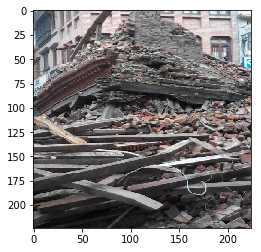

In [10]:
img = 'CD1I_P_UIAEFwb1.jpg'

predict(img, vgg16, vgg_model, "VGG")
predict(img, inception_v3, inception_model, "Inception")
predict(img, resnet50, resnet_model, "Resnet")
predict(img, mobilenet, mobilenet_model, "Mobilenet")